# Comparison between Nestorov and normal momentum approaches 

## Import libreries and define global variables

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from utils import get_data, onehot_encoding, grid_search, save_dict_to_file, load_dict_from_file
from Layer import Layer, Input
from functions import accuracy, MSE, MEE
import pandas as pd

In [2]:
DIR = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/' # Directory of the package.

## Import datasets

### Import MONK datasets

In [3]:
df = get_data(f'{DIR}data/MONK/monks-1.train')
df_test = get_data(f'{DIR}data/MONK/monks-1.test')

X_train_monk, y_train_monk = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test_monk, y_test_monk = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

### Import CUP dataset

Define the fraction of dataset which will represent the internal test set.

In [4]:
test_frac = 1/4

In [5]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv(f"{DIR}data/ML-CUP23-TR.csv", names=names, comment='#')

targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

df = df.sample(frac=1)

train_test_div = round((1-test_frac) * df.shape[0])

X_train_cup, y_train_cup = df[:train_test_div][features].to_numpy().T, df[:train_test_div][targets].to_numpy().T
X_test_cup, y_test_cup = df[train_test_div:][features].to_numpy().T, df[train_test_div:][targets].to_numpy().T

## Data preprocessing

### MONK preprocessing

Process one hot encoding on training and test sets.

In [6]:
X_train_monk = onehot_encoding(X_train_monk)
X_test_monk = onehot_encoding(X_test_monk)

### CUP preprocessing

Decide which data preprocessing method apply to cup training set:
+ MinMax normalization (preprocessing = 1)
+ Standardization (preprocessing = 2)

In [7]:
preprocessing = 0

In [8]:
if preprocessing == 1:
    X_train_cup = minmax_norm(X_train_cup)
    X_test_cup = minmax_norm(X_test_cup)
elif preprocessing == 2:
    X_train_cup = standard(X_train_cup)
    X_test_cup = standard(X_test_cup)

## MONK

Define training and model hyperparameters

In [71]:
orig_params = {'hidden_dim': 4,
        'hidden_act_func': 'tanh',
        'eta': 0.5,
        'lam': 0.0,
        'alpha': 0.9,
        'n_batch': 99,
        'use_opt':0,
        'nest': False,
        'l1_reg' : False,
        'epochs' : 500
        }

seed = np.random.randint(10,10000)

### Normal momentum

Build model

In [72]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'), init_weights_mode='rand')
output_layer = Layer(hidden_layer, 1, 'sigm', init_weights_mode='rand')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

init_weights_list = model.get_initial_weights_list()

Training with normal momentum:

In [73]:
np.random.seed(seed)
params['nest'] = False
history_nonest = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )

Epoch 0: train_loss: 6.848e-01, val_loss: 6.826e-01; train_accuracy: 5.051e+01, val_accuracy: 4.800e+01  train_MSE: 2.459e-01, val_MSE: 2.449e-01  lr : 0.5
Epoch 1: train_loss: 6.701e-01, val_loss: 6.735e-01; train_accuracy: 6.263e+01, val_accuracy: 5.600e+01  train_MSE: 2.386e-01, val_MSE: 2.403e-01  lr : 0.5
Epoch 2: train_loss: 6.574e-01, val_loss: 6.694e-01; train_accuracy: 6.465e+01, val_accuracy: 6.000e+01  train_MSE: 2.322e-01, val_MSE: 2.383e-01  lr : 0.5
Epoch 3: train_loss: 6.477e-01, val_loss: 6.714e-01; train_accuracy: 6.869e+01, val_accuracy: 6.400e+01  train_MSE: 2.277e-01, val_MSE: 2.392e-01  lr : 0.5
Epoch 4: train_loss: 6.371e-01, val_loss: 6.749e-01; train_accuracy: 6.566e+01, val_accuracy: 5.600e+01  train_MSE: 2.230e-01, val_MSE: 2.407e-01  lr : 0.5
Epoch 5: train_loss: 6.201e-01, val_loss: 6.735e-01; train_accuracy: 6.667e+01, val_accuracy: 6.000e+01  train_MSE: 2.152e-01, val_MSE: 2.398e-01  lr : 0.5
Epoch 6: train_loss: 5.962e-01, val_loss: 6.645e-01; train_accur

Epoch 32: train_loss: 2.726e-01, val_loss: 2.290e-01; train_accuracy: 8.788e+01, val_accuracy: 9.200e+01  train_MSE: 8.402e-02, val_MSE: 6.624e-02  lr : 0.5
Epoch 33: train_loss: 2.629e-01, val_loss: 2.353e-01; train_accuracy: 8.889e+01, val_accuracy: 9.200e+01  train_MSE: 8.031e-02, val_MSE: 7.088e-02  lr : 0.5
Epoch 34: train_loss: 2.551e-01, val_loss: 2.386e-01; train_accuracy: 8.990e+01, val_accuracy: 8.800e+01  train_MSE: 7.743e-02, val_MSE: 7.410e-02  lr : 0.5
Epoch 35: train_loss: 2.479e-01, val_loss: 2.339e-01; train_accuracy: 9.091e+01, val_accuracy: 8.800e+01  train_MSE: 7.463e-02, val_MSE: 7.350e-02  lr : 0.5
Epoch 36: train_loss: 2.404e-01, val_loss: 2.209e-01; train_accuracy: 9.091e+01, val_accuracy: 9.200e+01  train_MSE: 7.173e-02, val_MSE: 6.918e-02  lr : 0.5
Epoch 37: train_loss: 2.336e-01, val_loss: 2.045e-01; train_accuracy: 9.293e+01, val_accuracy: 9.200e+01  train_MSE: 6.925e-02, val_MSE: 6.324e-02  lr : 0.5
Epoch 38: train_loss: 2.275e-01, val_loss: 1.891e-01; trai

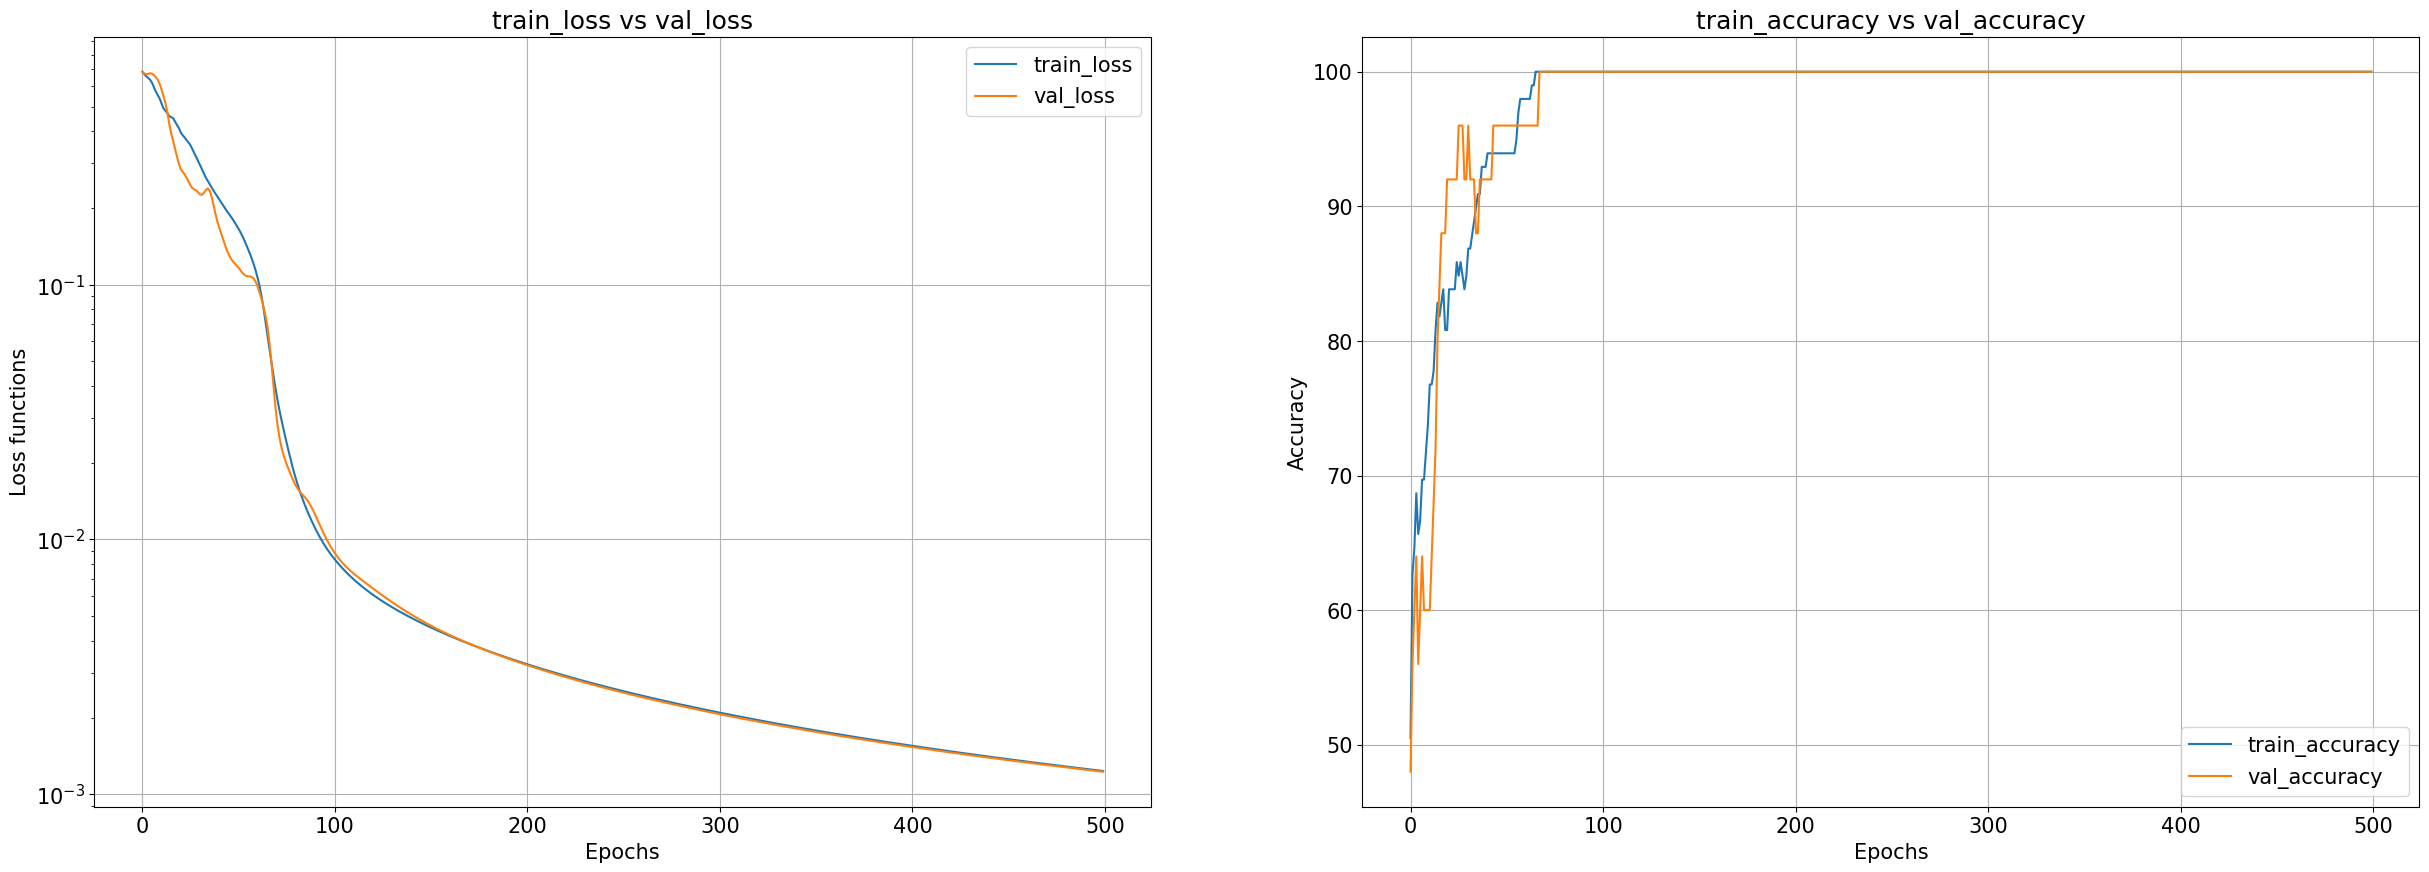

In [74]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'],label='train_loss')
plt.plot(history_nonest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nonest['train_accuracy'],label='train_accuracy')
plt.plot(history_nonest['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Nestorov momentum


Build model


In [75]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

model.set_initial_weights(init_weights_list)
arr = model.get_initial_weights_list()

Training with Nestorov momentum:


In [76]:
np.random.seed(seed)
params['nest'] = True
history_nest = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )


Epoch 0: train_loss: 6.848e-01, val_loss: 6.826e-01; train_accuracy: 5.051e+01, val_accuracy: 4.800e+01  train_MSE: 2.459e-01, val_MSE: 2.449e-01  lr : 0.5
Epoch 1: train_loss: 6.707e-01, val_loss: 6.741e-01; train_accuracy: 6.162e+01, val_accuracy: 5.200e+01  train_MSE: 2.389e-01, val_MSE: 2.406e-01  lr : 0.5
Epoch 2: train_loss: 6.571e-01, val_loss: 6.691e-01; train_accuracy: 6.162e+01, val_accuracy: 6.000e+01  train_MSE: 2.321e-01, val_MSE: 2.381e-01  lr : 0.5
Epoch 3: train_loss: 6.439e-01, val_loss: 6.669e-01; train_accuracy: 6.566e+01, val_accuracy: 6.400e+01  train_MSE: 2.258e-01, val_MSE: 2.371e-01  lr : 0.5
Epoch 4: train_loss: 6.288e-01, val_loss: 6.645e-01; train_accuracy: 6.768e+01, val_accuracy: 6.400e+01  train_MSE: 2.187e-01, val_MSE: 2.360e-01  lr : 0.5
Epoch 5: train_loss: 6.102e-01, val_loss: 6.589e-01; train_accuracy: 6.768e+01, val_accuracy: 6.400e+01  train_MSE: 2.101e-01, val_MSE: 2.336e-01  lr : 0.5
Epoch 6: train_loss: 5.888e-01, val_loss: 6.488e-01; train_accur

Epoch 31: train_loss: 2.627e-01, val_loss: 2.344e-01; train_accuracy: 9.091e+01, val_accuracy: 9.200e+01  train_MSE: 7.994e-02, val_MSE: 7.076e-02  lr : 0.5
Epoch 32: train_loss: 2.539e-01, val_loss: 2.283e-01; train_accuracy: 9.192e+01, val_accuracy: 9.200e+01  train_MSE: 7.657e-02, val_MSE: 6.972e-02  lr : 0.5
Epoch 33: train_loss: 2.457e-01, val_loss: 2.208e-01; train_accuracy: 9.192e+01, val_accuracy: 9.200e+01  train_MSE: 7.352e-02, val_MSE: 6.810e-02  lr : 0.5
Epoch 34: train_loss: 2.381e-01, val_loss: 2.119e-01; train_accuracy: 9.293e+01, val_accuracy: 9.200e+01  train_MSE: 7.073e-02, val_MSE: 6.586e-02  lr : 0.5
Epoch 35: train_loss: 2.312e-01, val_loss: 2.021e-01; train_accuracy: 9.293e+01, val_accuracy: 9.200e+01  train_MSE: 6.819e-02, val_MSE: 6.307e-02  lr : 0.5
Epoch 36: train_loss: 2.247e-01, val_loss: 1.916e-01; train_accuracy: 9.293e+01, val_accuracy: 9.200e+01  train_MSE: 6.584e-02, val_MSE: 5.981e-02  lr : 0.5
Epoch 37: train_loss: 2.186e-01, val_loss: 1.811e-01; trai

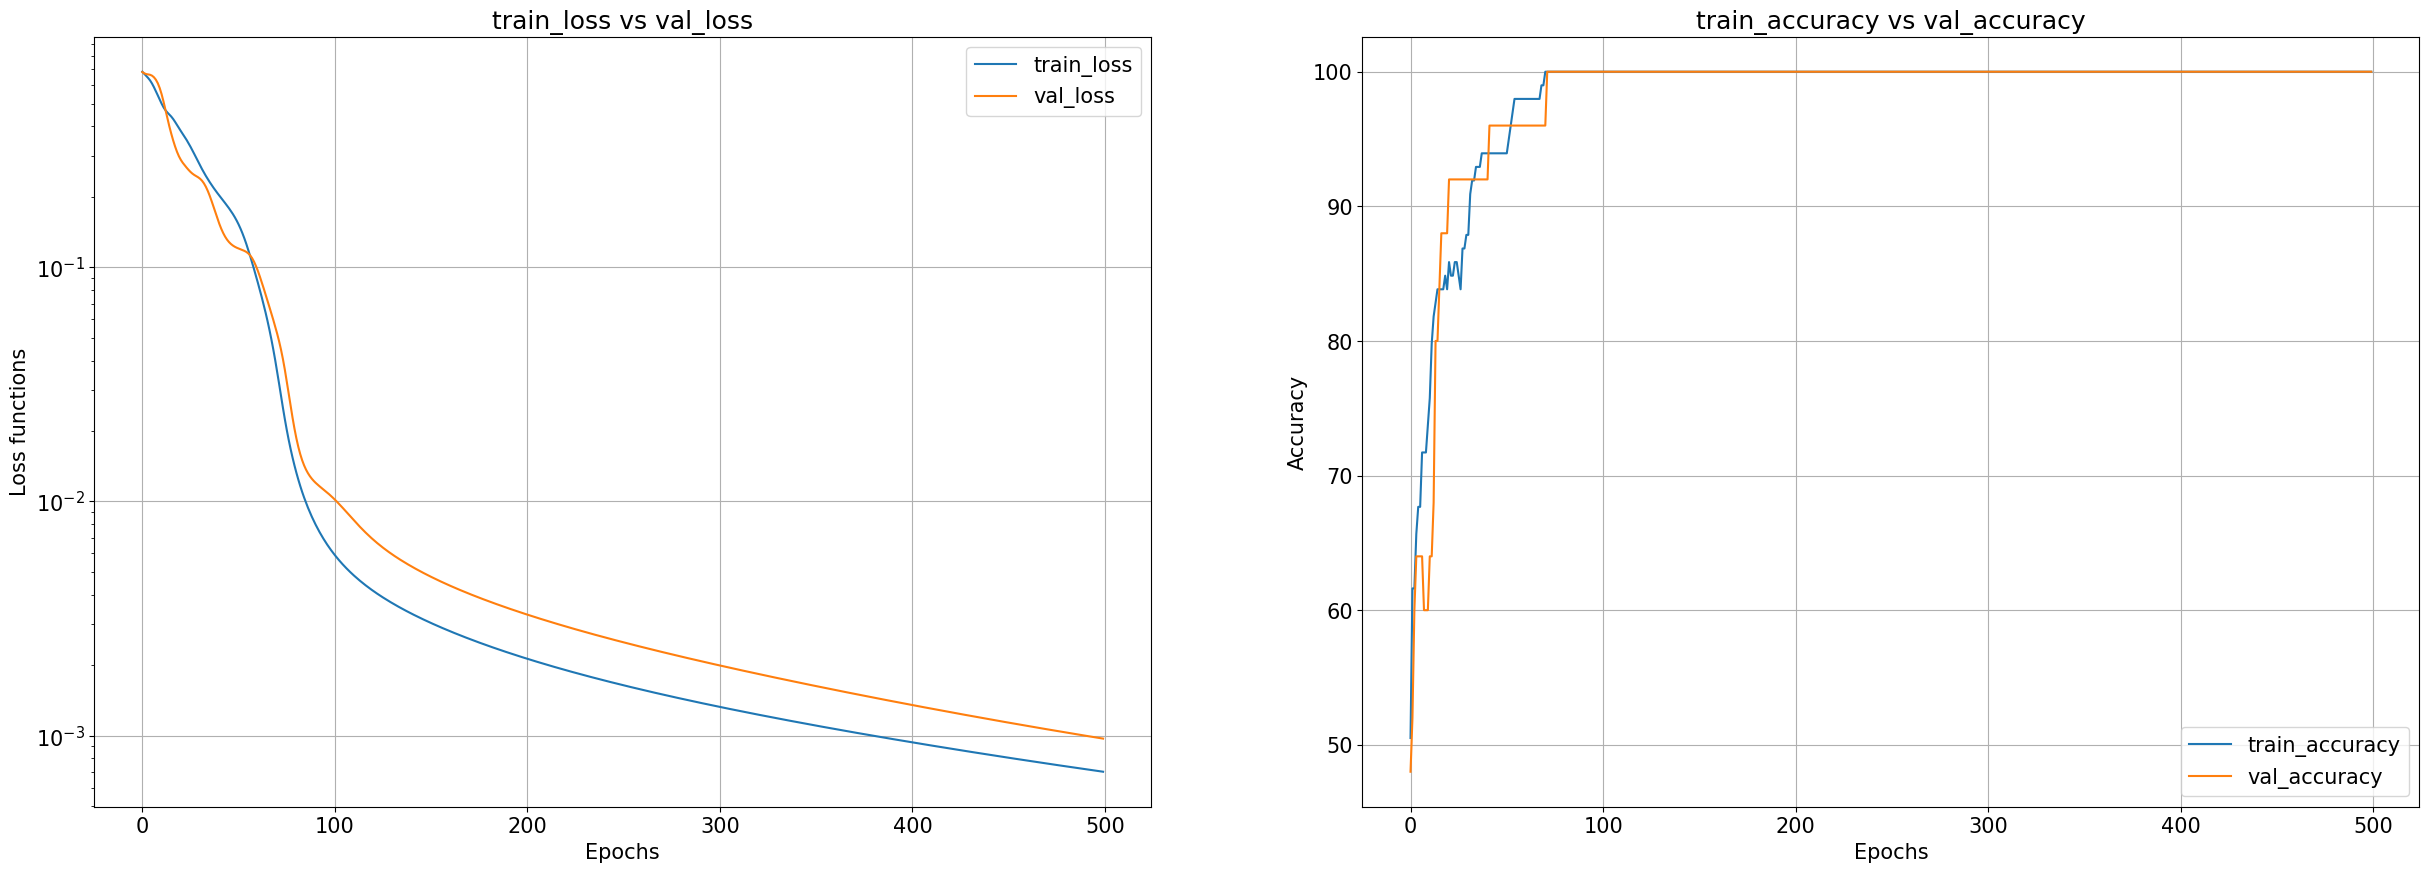

In [77]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nest['train_loss'],label='train_loss')
plt.plot(history_nest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nest['train_accuracy'],label='train_accuracy')
plt.plot(history_nest['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

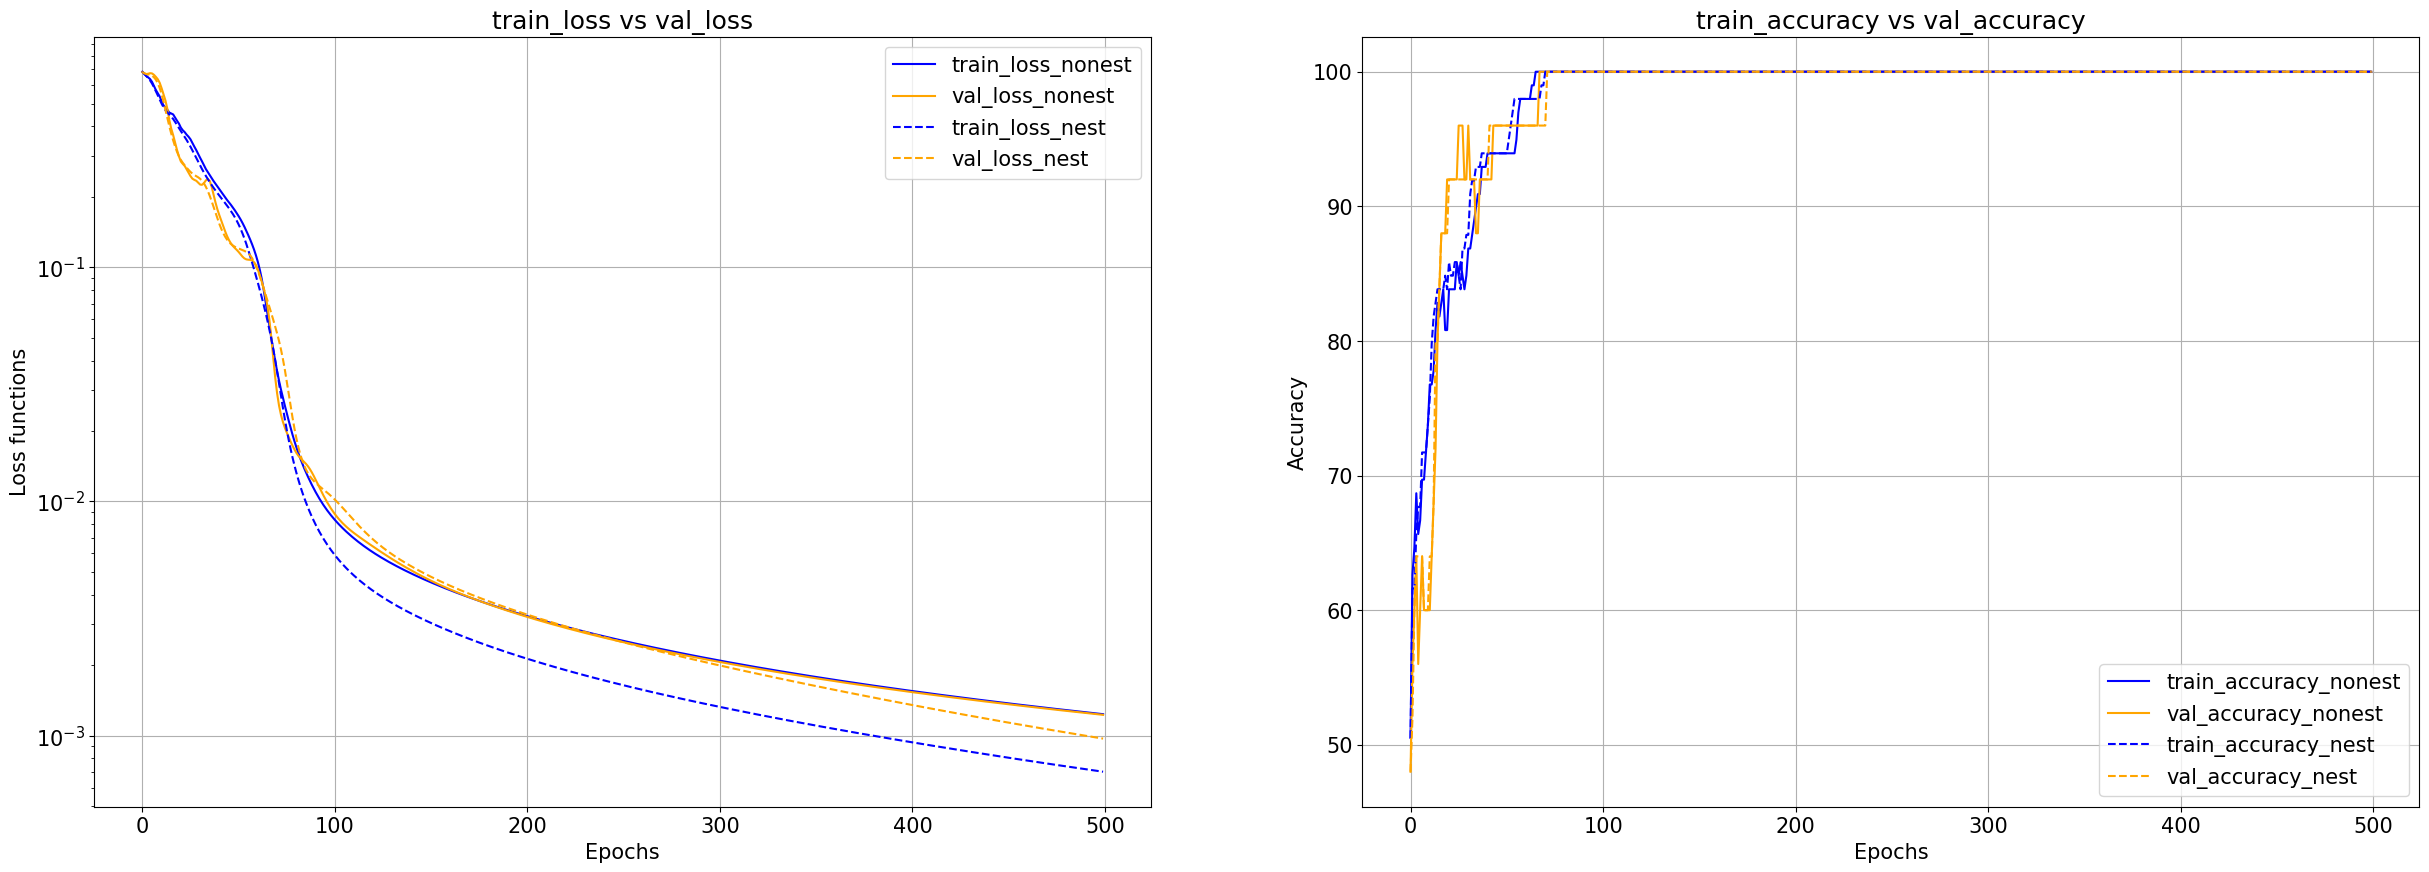

In [78]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'], '-', label='train_loss_nonest', color='blue')
plt.plot(history_nonest['val_loss'], '-', label='val_loss_nonest', color='orange')
plt.plot(history_nest['train_loss'], '--', label='train_loss_nest', color='blue')
plt.plot(history_nest['val_loss'], '--', label='val_loss_nest', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nonest['train_accuracy'], '-',label='train_accuracy_nonest', color='blue')
plt.plot(history_nonest['val_accuracy'], '-', label='val_accuracy_nonest', color='orange')
plt.plot(history_nest['train_accuracy'], '--', label='train_accuracy_nest', color='blue')
plt.plot(history_nest['val_accuracy'], '--', label='val_accuracy_nest', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

## CUP

Define training and model hyperparameters

In [79]:
orig_params = {'hidden_dim': 50,
        'hidden_act_func': 'tanh',
        'hidden_dim2': 50,
        'hidden_act_func2' : 'tanh',
        'eta': 0.003,
        'lam': 0.0001,
        'alpha': 0.9,
        'n_batch': 150,
        'use_opt':0,
        'nest': True,
        'l1_reg' : False,
        'epochs' : 500,
        'loss' : 'MSE',
        'output_act_func': 'lin'
        }

### Normal momentum

Build model

In [80]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

init_weights_list = model.get_initial_weights_list()

Training with normal momentum:

In [81]:
np.random.seed(42)
params['nest'] = False
history_nonest = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 4.674e+02, val_loss: 5.236e+02; train_MEE: 3.202e+01, val_MEE: 3.442e+01  lr : 0.003
Epoch 1: train_loss: 1.867e+02, val_loss: 2.165e+02; train_MEE: 2.018e+01, val_MEE: 2.176e+01  lr : 0.003
Epoch 2: train_loss: 8.285e+01, val_loss: 9.446e+01; train_MEE: 1.341e+01, val_MEE: 1.428e+01  lr : 0.003
Epoch 3: train_loss: 4.784e+01, val_loss: 5.213e+01; train_MEE: 1.023e+01, val_MEE: 1.068e+01  lr : 0.003
Epoch 4: train_loss: 3.140e+01, val_loss: 3.401e+01; train_MEE: 8.307e+00, val_MEE: 8.555e+00  lr : 0.003
Epoch 5: train_loss: 2.227e+01, val_loss: 2.504e+01; train_MEE: 6.899e+00, val_MEE: 7.195e+00  lr : 0.003
Epoch 6: train_loss: 1.748e+01, val_loss: 1.976e+01; train_MEE: 6.176e+00, val_MEE: 6.330e+00  lr : 0.003
Epoch 7: train_loss: 1.418e+01, val_loss: 1.664e+01; train_MEE: 5.493e+00, val_MEE: 5.724e+00  lr : 0.003
Epoch 8: train_loss: 1.154e+01, val_loss: 1.379e+01; train_MEE: 4.874e+00, val_MEE: 5.053e+00  lr : 0.003
Epoch 9: train_loss: 1.025e+01, val_loss: 1.25

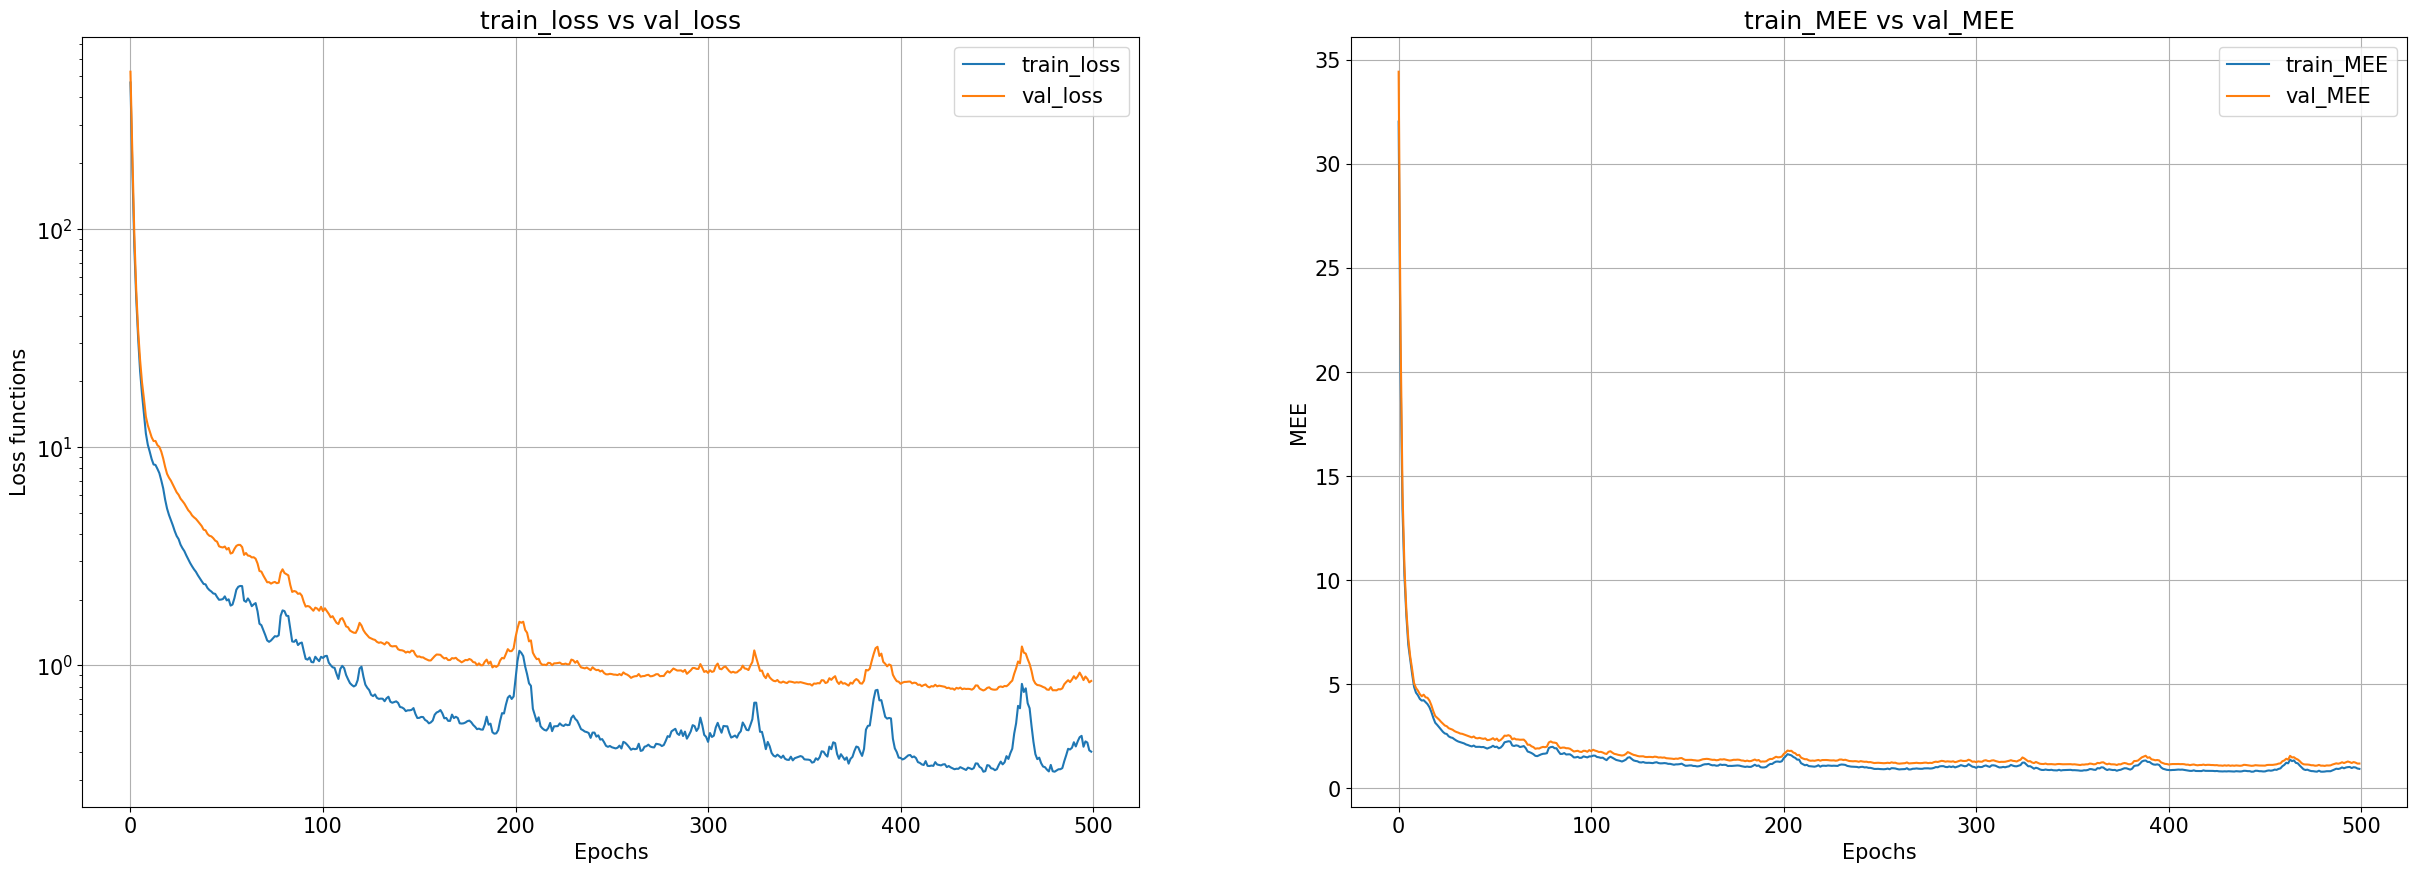

In [82]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'],label='train_loss')
plt.plot(history_nonest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nonest['train_MEE'],label='train_MEE')
plt.plot(history_nonest['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Nestorov momentum


Build model


In [83]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

model.set_initial_weights(init_weights_list)

Training with L1 regularization:


In [84]:
np.random.seed(42)
params['nest'] = True
history_nest = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 4.590e+02, val_loss: 5.139e+02; train_MEE: 3.146e+01, val_MEE: 3.389e+01  lr : 0.003
Epoch 1: train_loss: 1.801e+02, val_loss: 2.097e+02; train_MEE: 1.939e+01, val_MEE: 2.099e+01  lr : 0.003
Epoch 2: train_loss: 8.049e+01, val_loss: 9.274e+01; train_MEE: 1.292e+01, val_MEE: 1.390e+01  lr : 0.003
Epoch 3: train_loss: 4.543e+01, val_loss: 5.075e+01; train_MEE: 9.717e+00, val_MEE: 1.030e+01  lr : 0.003
Epoch 4: train_loss: 3.029e+01, val_loss: 3.375e+01; train_MEE: 8.070e+00, val_MEE: 8.498e+00  lr : 0.003
Epoch 5: train_loss: 2.152e+01, val_loss: 2.447e+01; train_MEE: 6.761e+00, val_MEE: 7.038e+00  lr : 0.003
Epoch 6: train_loss: 1.551e+01, val_loss: 1.869e+01; train_MEE: 5.508e+00, val_MEE: 5.883e+00  lr : 0.003
Epoch 7: train_loss: 1.240e+01, val_loss: 1.532e+01; train_MEE: 4.814e+00, val_MEE: 5.200e+00  lr : 0.003
Epoch 8: train_loss: 1.077e+01, val_loss: 1.350e+01; train_MEE: 4.597e+00, val_MEE: 4.945e+00  lr : 0.003
Epoch 9: train_loss: 1.139e+01, val_loss: 1.36

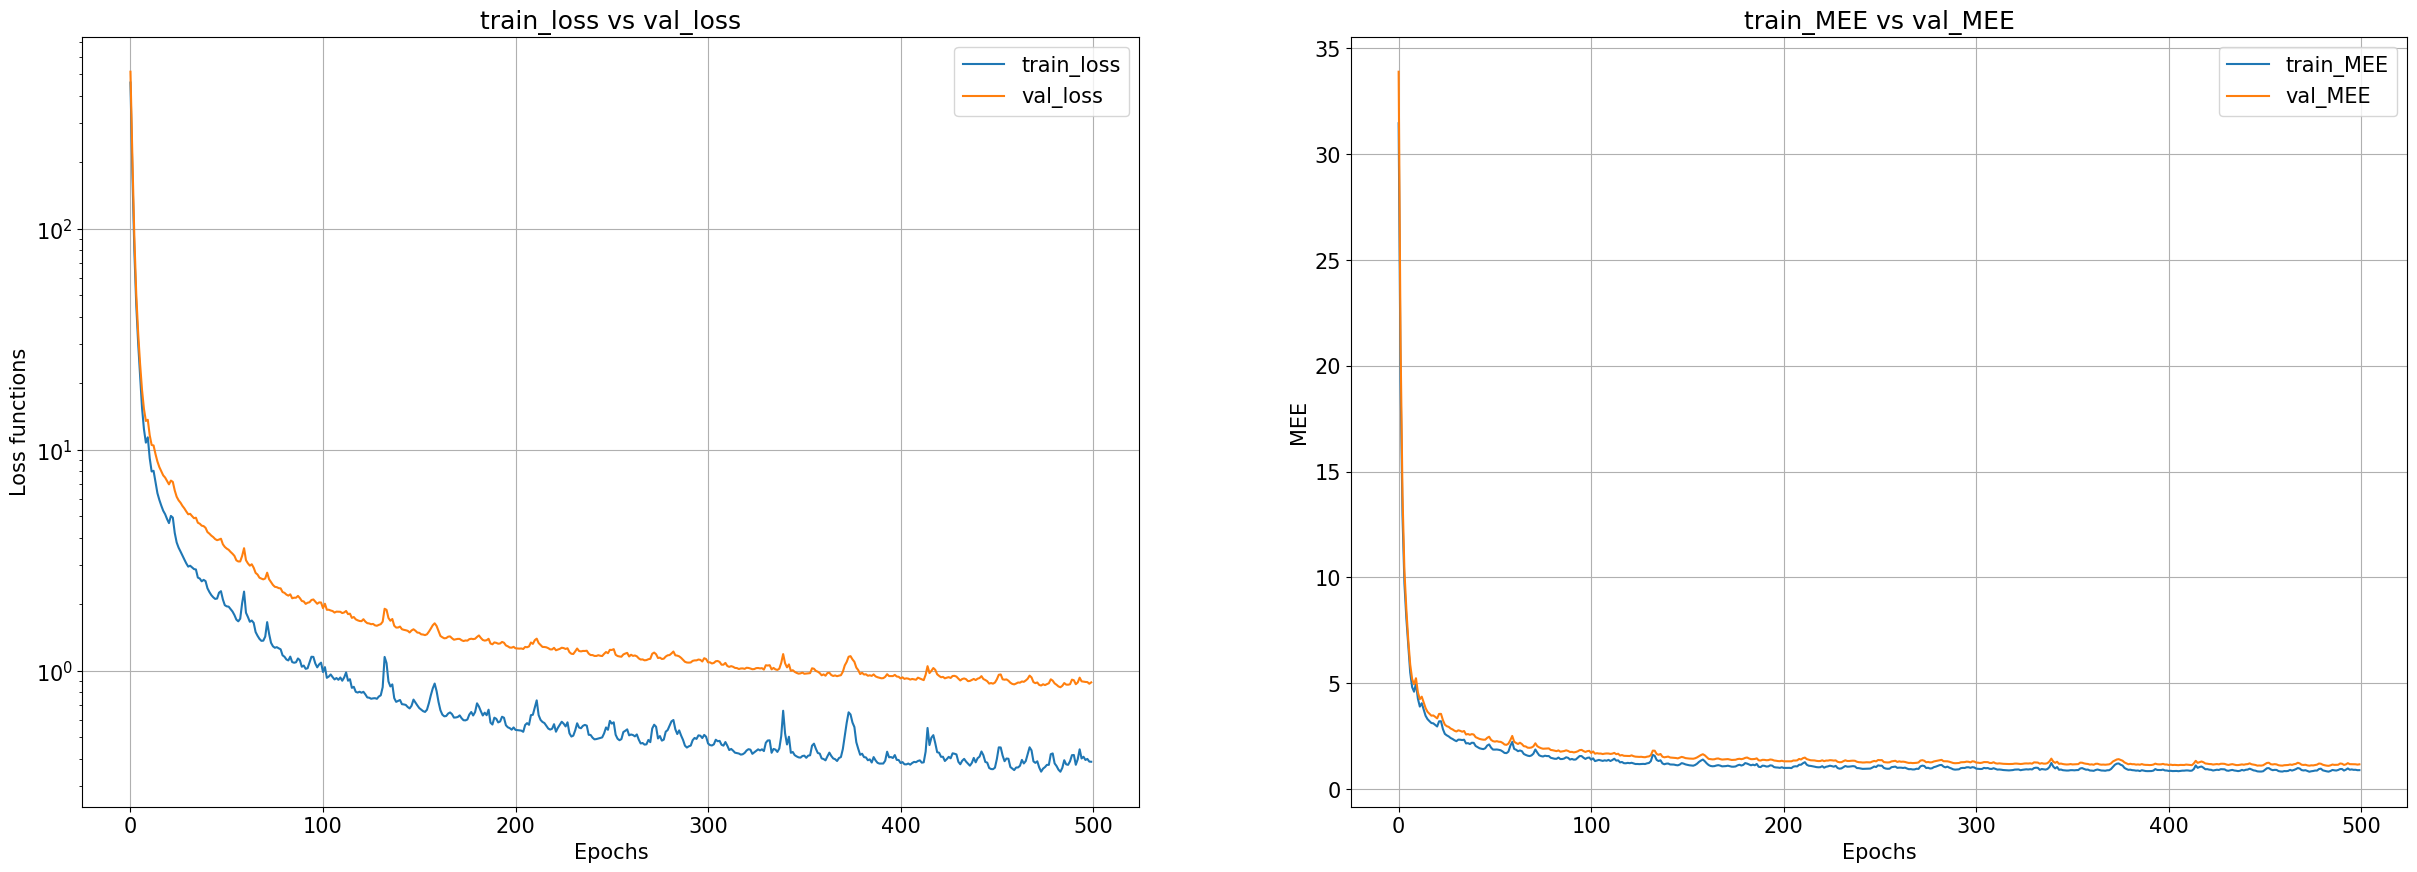

In [85]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nest['train_loss'],label='train_loss')
plt.plot(history_nest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nest['train_MEE'],label='train_MEE')
plt.plot(history_nest['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

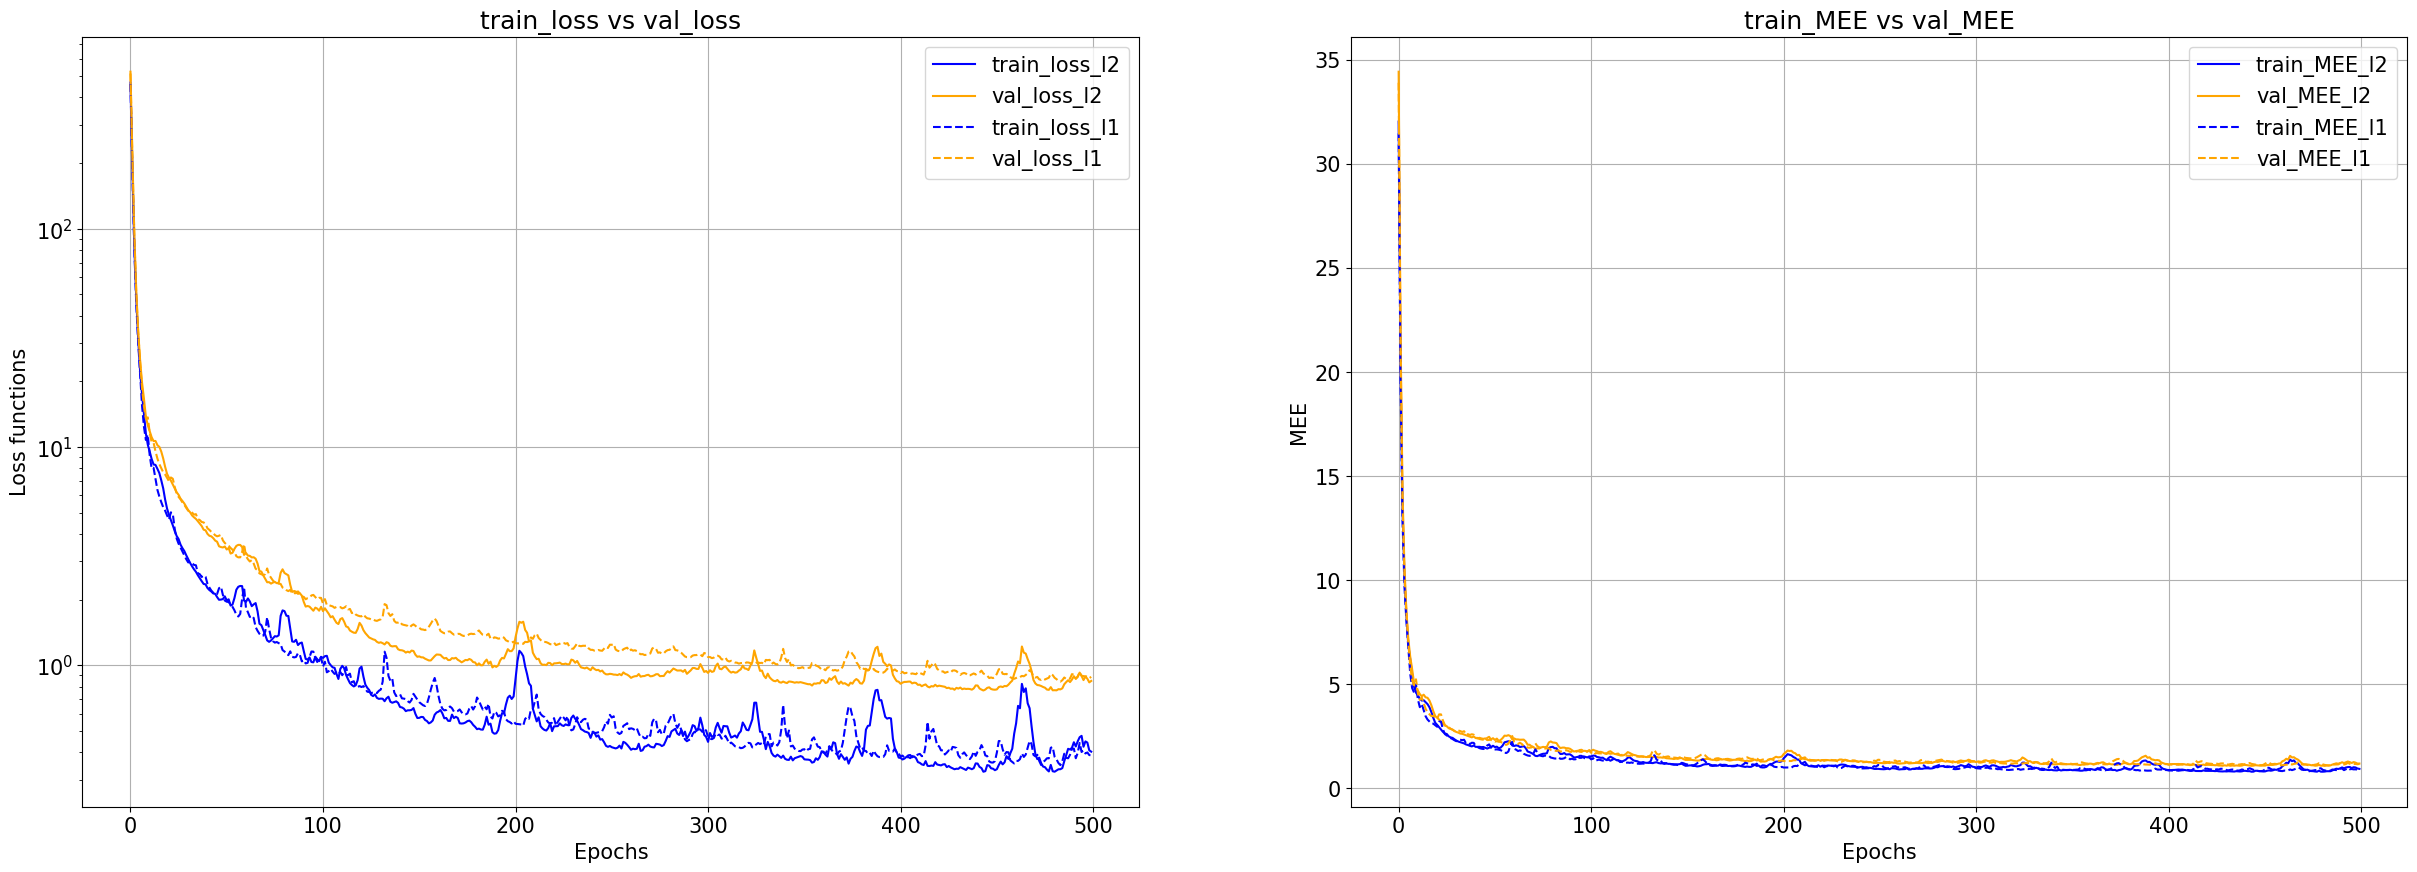

In [86]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'], '-', label='train_loss_nonest', color='blue')
plt.plot(history_nonest['val_loss'], '-', label='val_loss_nonest', color='orange')
plt.plot(history_nest['train_loss'], '--', label='train_loss_nest', color='blue')
plt.plot(history_nest['val_loss'], '--', label='val_loss_nest', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nonest['train_MEE'], '-',label='train_MEE_nonest', color='blue')
plt.plot(history_nonest['val_MEE'], '-', label='val_MEE_nonest', color='orange')
plt.plot(history_nest['train_MEE'], '--', label='train_MEE_nest', color='blue')
plt.plot(history_nest['val_MEE'], '--', label='val_MEE_nest', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)